In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2023-05-19 00:26:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.06s   

2023-05-19 00:26:33 (318 KB/s) - ‘student.zip’ saved [20478/20478]



In [ ]:
!unzip "student.zip"

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
import pandas as pd

In [ ]:
students = pd.read_csv("student-por.csv", sep=";")

In [ ]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
# calculate pass; 1 if G1 + G2 + G3 >= 35 else 0
students['pass'] = students.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)

In [ ]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


In [ ]:
# drop G1, G2 and G3 columns
students = students.drop(['G1', 'G2', 'G3'], axis=1)

In [ ]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [ ]:
encoded_students = pd.get_dummies(students, columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
])

In [ ]:
encoded_students.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,2,2,0,4,3,4,1,1,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,2,0,5,3,3,1,1,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,2,0,4,3,2,2,3,3,...,1,0,0,1,0,1,0,1,1,0
3,15,1,3,0,3,2,2,1,1,5,...,0,1,0,1,0,1,0,1,0,1
4,16,1,2,0,4,3,2,1,2,5,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
# shuffle the rows
encoded_students = encoded_students.sample(frac=1)

# split training data and testing data
encoded_students_train = encoded_students[:500]
encoded_students_test = encoded_students[500:]

# training set
X_train = encoded_students_train.drop(['pass'], axis=1)
y_train = encoded_students_train['pass']

# testing set
X_test = encoded_students_test.drop(['pass'], axis=1)
y_test = encoded_students_test['pass']

In [ ]:
import numpy as np

X = encoded_students.drop(['pass'], axis=1)
y = encoded_students['pass']

print("Passing %d out %d (%.2f%%)" % (np.sum(y), len(y), 100*float(np.sum(y)) / len(y)))

Passing 328 out 649 (50.54%)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Build SVM classifier (automatic gamma)
lclf = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, random_state=0, tol=1e-3))
lclf.fit(X_train, y_train)
lclf.score(X_test, y_test)

0.7516778523489933

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Build SVM classifier (automatic gamma)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7315436241610739

In [ ]:
# Train test using 70:30 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y),test_size = 0.30, random_state = 101)

### Feature scaling

Scale the features with a zero mean and unit variance, altogether:

\begin{align}
  z = \frac{x-\mu}{\delta}
\end{align}

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.fit_transform(X_test)

### Linear SVM

Classification accuracy: 0.6974 

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        93
           1       0.71      0.72      0.71       102

    accuracy                           0.70       195
   macro avg       0.70      0.70      0.70       195
weighted avg       0.70      0.70      0.70       195



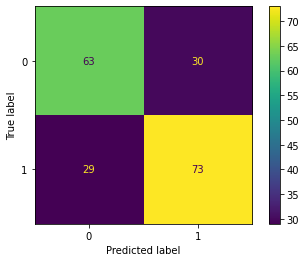

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# linear_model = LinearSVC(max_iter=3000)
# linear_model.fit(scaled_Xtrain, y_train)

linear_model = SVC(kernel="linear")
linear_model.fit(scaled_Xtrain, y_train)

# print prediction results
predictions = linear_model.predict(scaled_Xtest)
accu = linear_model.score(scaled_Xtest, y_test)

print("Classification accuracy: %.4f \n" % accu)
print(classification_report(y_test, predictions))

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, labels=linear_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_model.classes_)
disp.plot()

0.70 accuracy with a standard deviation of 0.04


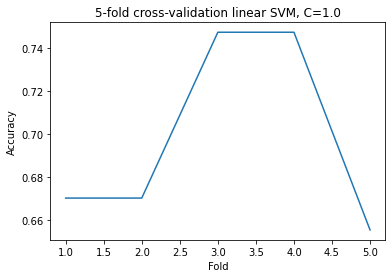

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score, KFold
from matplotlib import pyplot as plt

kf = KFold(n_splits=5)
scores = cross_val_score(linear_model, scaled_Xtrain, y_train, cv=kf, scoring="accuracy")
xi = [*range(1, len(scores)+1, 1)]
plt.plot(xi, scores)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("5-fold cross-validation linear SVM, C=1.0")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### RBF kernel SVM without optimal hyper-parameters

Classification accuracy: 0.7333 

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        93
           1       0.75      0.74      0.74       102

    accuracy                           0.73       195
   macro avg       0.73      0.73      0.73       195
weighted avg       0.73      0.73      0.73       195



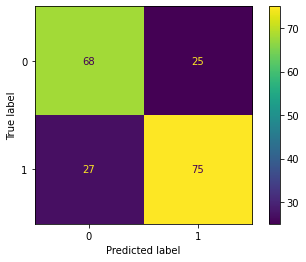

In [ ]:
# train the model on train set
nonlinear_model = SVC()

nonlinear_model = SVC(kernel="rbf")
nonlinear_model.fit(scaled_Xtrain, y_train)

# print prediction results
predictions = nonlinear_model.predict(scaled_Xtest)
accu = nonlinear_model.score(scaled_Xtest, y_test)

print("Classification accuracy: %.4f \n" % accu)
print(classification_report(y_test, predictions))

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, labels=nonlinear_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nonlinear_model.classes_)
disp.plot()

0.72 accuracy with a standard deviation of 0.02


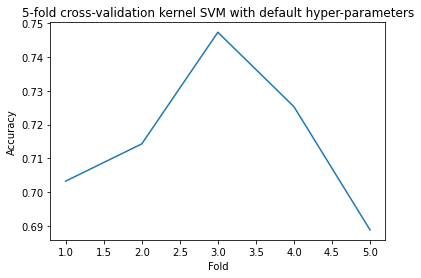

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score, KFold
from matplotlib import pyplot as plt

kf = KFold(n_splits=5)
scores = cross_val_score(nonlinear_model, scaled_Xtrain, y_train, cv=kf, scoring="accuracy")
xi = [*range(1, len(scores)+1, 1)]
plt.plot(xi, scores)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("5-fold cross-validation kernel SVM with default hyper-parameters")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# Use GridsearchCV

from sklearn.model_selection import GridSearchCV, KFold

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-5],
			'kernel': ['rbf']}

kf = KFold(n_splits=5)
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring="accuracy", cv=kf)

# fitting the model for grid search
grid.fit(scaled_Xtrain, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.473 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.407 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.484 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.462 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.467 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.473 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.407 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.484 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.462 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.473 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


Classification accuracy: 0.7231 

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        93
           1       0.73      0.75      0.74       102

    accuracy                           0.72       195
   macro avg       0.72      0.72      0.72       195
weighted avg       0.72      0.72      0.72       195



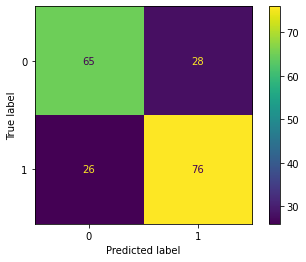

In [ ]:
# print prediction results
grid_predictions = grid.predict(scaled_Xtest)
accu = grid.score(scaled_Xtest, y_test)

print("Classification accuracy: %.4f \n" % accu)
print(classification_report(y_test, grid_predictions))

# plot confusion matrix
cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()